<a href="https://colab.research.google.com/github/cuillerj/ApeRobot/blob/master/trainDayFoscamLocalv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup environment

In [ ]:
#%tensorflow_version 1.x
import tensorflow as tf
import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from pathlib import Path
import pandas as pd
import shutil
import random
tf.__version__
from skimage import data
import matplotlib.pyplot as plt 
%matplotlib inline
from PIL import Image, ImageDraw, ImageFilter,ImageOps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
print(tf.__version__)
import mysql.connector
domotique = mysql.connector.connect(
  host="192.168.1.199",
  user="jean",
  password="manu7890",
  database="domotiquedata"
)

print(domotique)

2.2.0


**Set parameters and directories**

In [ ]:
left = 15
top = 80
right = 1250
bottom = 720
left2 = 160
top2 = 280
right2 = 850
bottom2 = 600

IMG_WIDTH=round((right-left)/2)
IMG_HEIGHT=round((bottom-top)/2)
newsize =(IMG_WIDTH,IMG_HEIGHT)
IMG_WIDTH2=round((right2-left2)/2)
IMG_HEIGHT2=round((bottom2-top2)/2)
newsize2 =(IMG_WIDTH2,IMG_HEIGHT2)
imageQuality = 75
print(newsize2)

train_dir='E:/Colab/Foscam/train/files/'
validation_dir='E:/Colab/Foscam/val/files/'
origin_dir='X:/foscam/FI9800P_00626EE953EB/snap/'
checkpoint_path = "E:/Colab/Foscam/trainingv3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

(345, 160)


**extract convert and assign pictures**

In [ ]:
  #delete all previous files
  filepath = os.path.join(train_dir, "someone")
  [f.unlink() for f in Path(filepath).glob("*") if f.is_file()] 
  filepath = os.path.join(train_dir, "nobody")
  [f.unlink() for f in Path(filepath).glob("*") if f.is_file()] 
  filepath = os.path.join(validation_dir, "someone")
  [f.unlink() for f in Path(filepath).glob("*") if f.is_file()] 
  filepath = os.path.join(validation_dir, "nobody")
  [f.unlink() for f in Path(filepath).glob("*") if f.is_file()] 
  #import new files
  originPrefix="MDAlarm_"
  destPrefix="FI9800P_"
  mycursor = domotique.cursor()
  sql = "SELECT * FROM webCamPictures where pictureCheckValue in(1,-1) and pictureType=1 order by pictureName desc limit 100000"
  mycursor.execute(sql)
  records = mycursor.fetchall()
  nbRecords=mycursor.rowcount
  print(nbRecords, "record selected.")
  randomlist = []
  for i in range(0,round(nbRecords/4)):
    n = random.randint(1,nbRecords)
    randomlist.append(n)
  print("validation records:",len(randomlist))
  idx=0
  for row in records:
    if (idx in randomlist):
      dest_dir=validation_dir
    else:
      dest_dir=train_dir
    fname=row[1]
    idx=idx+1
    try:
      fname=fname.replace(originPrefix,destPrefix)
      if (row[3]=="someone" and row[4]==1):
            src=pathlib.Path(os.path.join(origin_dir,fname))
            dest=pathlib.Path(os.path.join(dest_dir+"someone",fname))
          # print("someone:",fname)
            shutil.copyfile(src,dest)
            im1 = Image.open(dest)
            if (im1.size!=newsize):
            #  print(im1.size)
              im1 = im1.crop((left, top, right, bottom))
              im1 = im1.resize(newsize)
              im1 = im1.save(str(dest),quality=imageQuality)
      if (row[3]=="someone" and row[4]==-1):
            src=pathlib.Path(os.path.join(origin_dir,fname))
            dest=pathlib.Path(os.path.join(dest_dir+"nobody",fname))
            #print("nobody:",fname)
            shutil.copyfile(src,dest)
            im1 = Image.open(dest)
            if (im1.size!=newsize):
            #  print(im1.size)
              im1 = im1.crop((left, top, right, bottom))
              im1 = im1.resize(newsize)
              im1 = im1.save(str(dest),quality=imageQuality)
      if (row[3]=="nobody" and row[4]==1):
            src=pathlib.Path(os.path.join(origin_dir,fname))
            dest=pathlib.Path(os.path.join(dest_dir+"nobody",fname))
            #print("nobody:",fname)
            shutil.copyfile(src,dest)
            im1 = Image.open(dest)
            if (im1.size!=newsize):
            #  print(im1.size)
              im1 = im1.crop((left, top, right, bottom))
              im1 = im1.resize(newsize)
              im1 = im1.save(str(dest),quality=imageQuality)
      if (row[3]=="nobody" and row[4]==-1):
            src=pathlib.Path(os.path.join(origin_dir,fname))
            dest=pathlib.Path(os.path.join(dest_dir+"someone",fname))
            #print("someone:",fname)
            shutil.copyfile(src,dest)
            im1 = Image.open(dest)
            if (im1.size!=newsize):
            #  print(im1.size)
              im1 = im1.crop((left, top, right, bottom))
              im1 = im1.resize(newsize)
              im1 = im1.save(str(dest),quality=imageQuality)
    except (OSError, IOError) as e:
        print("file error:",fname)
  mycursor.close()

14363 record selected.
validation records: 3591
file error: FI9800P_20210330-110407.jpg
file error: FI9800P_20210330-110405.jpg
file error: FI9800P_20210330-110403.jpg
file error: FI9800P_20210330-110215.jpg
file error: FI9800P_20210330-110213.jpg
file error: FI9800P_20210330-110211.jpg
file error: FI9800P_20210330-110209.jpg
file error: FI9800P_20210330-110207.jpg
file error: FI9800P_20210330-110205.jpg
file error: FI9800P_20210330-110110.jpg
file error: FI9800P_20210330-110108.jpg
file error: FI9800P_20210330-110106.jpg
file error: FI9800P_20210330-110104.jpg
file error: FI9800P_20210330-110102.jpg
file error: FI9800P_20210330-110100.jpg
file error: FI9800P_20210330-110030.jpg
file error: FI9800P_20210330-110028.jpg
file error: FI9800P_20210330-110026.jpg
file error: FI9800P_20210330-110016.jpg
file error: FI9800P_20210330-110014.jpg
file error: FI9800P_20210330-110012.jpg
file error: FI9800P_20210330-105952.jpg
file error: FI9800P_20210330-105950.jpg
file error: FI9800P_20210330-105

True

In [ ]:

data_dir = pathlib.Path(os.path.join(train_dir,'someone'))
someoneList = list(data_dir.glob('*.jpg'))
someone_count = len(list(data_dir.glob('*.jpg')))
data_dir = pathlib.Path(os.path.join(train_dir,'nobody'))
nobodyList = list(data_dir.glob('*.jpg'))
nobody_count = len(list(data_dir.glob('*.jpg')))

data_dir = pathlib.Path(os.path.join(validation_dir,'someone'))
someoneValList = list(data_dir.glob('*.jpg'))
someone_Valcount = len(list(data_dir.glob('*.jpg')))
data_dir = pathlib.Path(os.path.join(validation_dir,'nobody'))
nobodyValList = list(data_dir.glob('*.jpg'))
nobody_Valcount = len(list(data_dir.glob('*.jpg')))


total_train = nobody_count+someone_count
total_val = nobody_Valcount+someone_Valcount


**Print images count**

In [ ]:
print ("train someone count:",someone_count)
print ("train nobody count:",nobody_count)
print ("validation someone count:",someone_Valcount)
print ("validation nobody count:",nobody_Valcount)
print ("Total train images:",total_train)
print ("Total validation images:",total_val)

train someone count: 5291
train nobody count: 5844
validation someone count: 1474
validation nobody count: 1702
Total train images: 11135
Total validation images: 3176


Display some nobody images to check

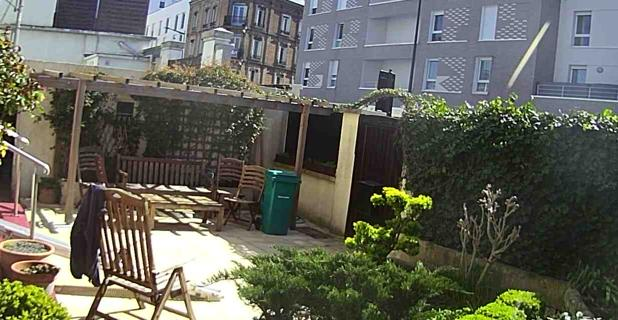

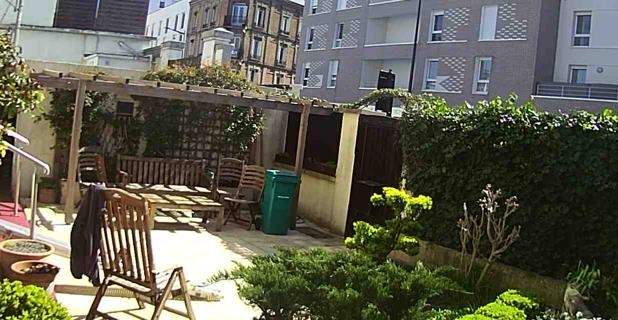

In [ ]:
data_dir = pathlib.Path(os.path.join(train_dir,'nobody'))
imagesList = list(data_dir.glob('*.jpg'))
for image in imagesList[:2]:
  display.display(Image.open(str(image)))

Display some someone images to *check*

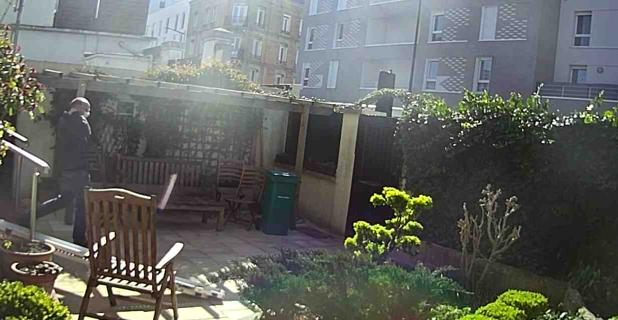

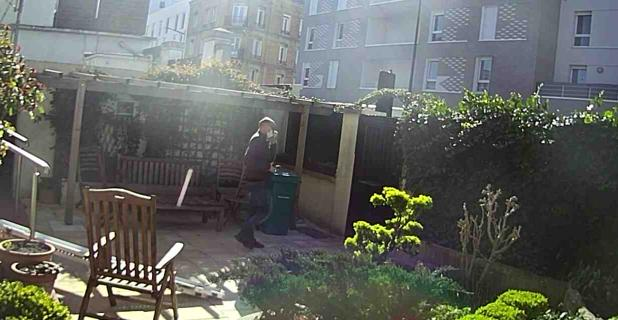

In [ ]:
data_dir = pathlib.Path(os.path.join(train_dir,'someone'))
imagesList = list(data_dir.glob('*.jpg'))
for image in imagesList[:2]:
  display.display(Image.open(str(image)))

**# Define and train the model**

**Define model**

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [ ]:
batch_size = 1
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT2, IMG_WIDTH2),
                                                           class_mode='binary')

Found 11135 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT2, IMG_WIDTH2),
                                                              class_mode='binary')

Found 3176 images belonging to 2 classes.


In [ ]:
# the best one
model = Sequential([
    Conv2D(8, 1, padding='same', activation='relu', input_shape=(IMG_HEIGHT2, IMG_WIDTH2 ,3)),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 345, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 172, 8)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 172, 16)       1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 86, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 43, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 43, 64)        1

In [ ]:
#  checkpint
latest = tf.train.latest_checkpoint(checkpoint_dir)
#  reload weights - comment model.load to restart a complete learning
model.load_weights(latest)
epochs = 1 # 1 for update run - set to 10 for a complete learning
print("weights loaded")

weights loaded


In [ ]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
startTime=datetime.today()
print(startTime)
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train/batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val, 
    callbacks=[cp_callback]
)
endTime=datetime.today()
print(endTime)
print(endTime-startTime)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2022-01-10 10:02:31.072410
11133/11135 [============================>.] - ETA: 0s - loss: 0.1080 - accuracy: 0.9657

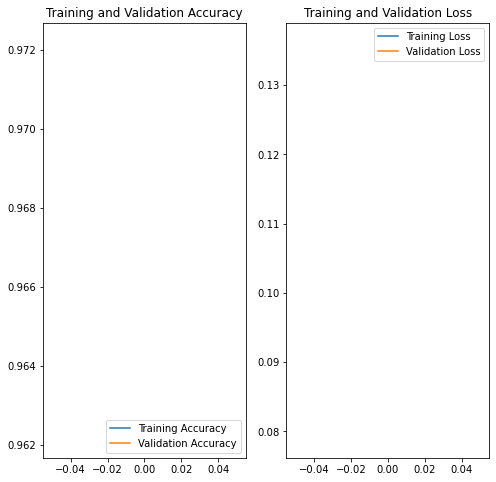

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/Foscam/modelv3.h5')
tf.saved_model.save(model, "/content/drive/My Drive/Foscam/model/")

OSError: ignored

In [ ]:
STEP_SIZE_TEST=test_generator.n //test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

547/547 [==============================] - 1s 2ms/step


In [ ]:
x=pred>=0
predicted_class_indices=[int(item) for item in x]


In [ ]:
labels = (train_data_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
predictions 

In [ ]:
#import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("/content/drive/My Drive/Foscam/results.csv",index=False)

FileNotFoundError: ignored

In [ ]:
checkpoint_path

'/content/drive/My Drive/Foscam/training_1/cp.ckpt'

In [ ]:
data_dir = pathlib.Path('/content/drive/My Drive/Foscam/training_1')
ckptList = list(data_dir.glob('*.*'))
ckptList

[PosixPath('/content/drive/My Drive/Foscam/training_1/cp.ckpt.data-00000-of-00002'),
 PosixPath('/content/drive/My Drive/Foscam/training_1/cp.ckpt.data-00001-of-00002'),
 PosixPath('/content/drive/My Drive/Foscam/training_1/cp.ckpt.index')]

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'E:/Colab/Foscam/training_2\\cp.ckpt'

In [ ]:
# Create a new model instance
model = create_model()
#imported = tf.saved_model.load('/content/drive/My Drive/Foscam/model')

# Load the previously saved weights
model.load_weights(latest)

NameError: ignored

In [ ]:
STEP_SIZE_TEST=test_generator.n //test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

547/547 [==============================] - 1s 2ms/step


In [ ]:
x=pred>=0
predicted_class_indices=[int(item) for item in x]
labels = (train_data_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("/content/drive/My Drive/Foscam/results.csv",index=False)

In [ ]:
# Define a simple sequential model
def create_model():
    model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(128, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(2048, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 320, 618, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 160, 309, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 160, 309, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 80, 154, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 80, 154, 64)       18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 40, 77, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 40, 77, 128)      

In [ ]:
startTime=datetime.today()
print(startTime)
endTime=datetime.today()
print(endTime)
print(endTime-startTime)

2021-03-18 07:56:41.225506
2021-03-18 07:56:41.225506
0:00:00


In [ ]:
test_dir='X:/foscam/toDetermineDay2'
data_dir = pathlib.Path(os.path.join(test_dir,'files'))
testList = list(data_dir.glob('MDAlarm*.jpg'))
total_test = len(list(data_dir.glob('MDAlarm*.jpg')))
total_test

14889

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [ ]:
test_generator = test_image_generator.flow_from_directory(batch_size=1,
                                                                      directory=test_dir,
                                                                      shuffle=False,
                                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                      class_mode='binary')

Found 14889 images belonging to 1 classes.


In [ ]:
            STEP_SIZE_TEST=test_generator.n //test_generator.batch_size

In [ ]:
test_generator.reset()

In [ ]:
            pred=model.predict(test_generator,
            steps=STEP_SIZE_TEST,
            verbose=1)

InvalidArgumentError: ignored